# **MNIST Digit Recognizer challenge**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


The above code segment enables me to access the dataset that I have uploaded onto my Google Drive

### Header files

In [0]:
# file access
import os

# linear algebra
import numpy as np
 
# data processing
import pandas as pd
 
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# building the model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation,BatchNormalization

Showing the Location of all the files that have been used.


*   Model.h5 is the weights of the model that has already been trained




In [3]:
os.listdir("/content/drive/My Drive/Projects/MNIST")

['MNIST.ipynb', 'mnist_test.csv', 'mnist_train.csv', 'model.h5']

## Data Handling 

The following code segments are used to read the raw datasets and recieve them in a format which would be ready to feed it into the model for training/testing.

In [0]:
TrainData = pd.read_csv("/content/drive/My Drive/Projects/MNIST/mnist_train.csv")
TestData = pd.read_csv("/content/drive/My Drive/Projects/MNIST/mnist_test.csv")

In [0]:
x_train = TrainData.values[:,1:]
y_train = TrainData.values[:,0]
x_test = TestData.values[:,1:]
y_test = TestData.values[:,0]

In [6]:
print(x_train.shape)
print(x_train[0])

(60000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0  

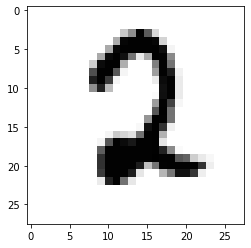

In [7]:
# To view a sample image 

img = x_train[3242]
img = img.reshape((28,28))
img = img/255
plt.imshow(img,cmap='Greys')


Owing to the fact that the initial conv2D only takes in dataset of 4-Dimensions, the obtained arrays have been resized.

The data has been:

*   Resized
*   Normalized by dividing by 255




In [8]:
#Reshaping to a 4D structure to feed into the Network

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#normalizing the given data by dividing by 255

x_train = x_train /255
x_test = x_test /255

input_shape = x_train.shape
print(input_shape)

(60000, 28, 28, 1)


## **Model Creation** 

The below model has been replicated :-



![alt text](https://miro.medium.com/max/1000/1*5A4b1qOZIr4Q6SKceqGn7w.jpeg)

In [9]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),name='0'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',name='1'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.29))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
0 (Conv2D)                   (None, 28, 28, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
1 (Conv2D)                   (None, 14, 14, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0   

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])



## **Model Training**

In [11]:
# To Preload the Model to train on top of it 
# model.load_weights('/content/drive/My Drive/Projects/MNIST/model.h5')
history = model.fit(x=x_train,y=y_train,validation_split=0.1, epochs=18)

# Saving the model obtained after training
model.save('/content/drive/My Drive/Projects/MNIST/model.h5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/18
54000/54000 [==============================] - 61s 1ms/step - loss: 0.2016 - acc: 0.9396 - val_loss: 0.0590 - val_acc: 0.9835
Epoch 2/18
54000/54000 [==============================] - 60s 1ms/step - loss: 0.0841 - acc: 0.9748 - val_loss: 0.0473 - val_acc: 0.9877
Epoch 3/18
54000/54000 [==============================] - 60s 1ms/step - loss: 0.0631 - acc: 0.9813 - val_loss: 0.0495 - val_acc: 0.9860
Epoch 4/18
54000/54000 [==============================] - 60s 1ms/step - loss: 0.0522 - acc: 0.9837 - val_loss: 0.0627 - val_acc: 0.9827
Epoch 5/18
54000/54000 [==============================] - 60s 1ms/step - loss: 0.0433 - acc: 0.9859 - val_loss: 0.0420 - val_acc: 0.9895
Epoch 6/18
54000/54000 [==============================] - 59s 1ms/step - loss: 0.0371 - acc: 0.9876 - val_loss: 0.0419 - val_acc: 0.9900
Epoch 7/18
54000/54000 [=========

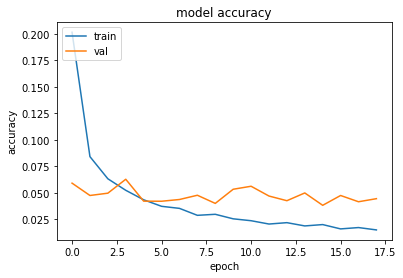

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Since I have not declared the Model declaration as a standalone function, If you seek to load the model without re-training it, You'll have to re-run the model declarartion code Segment.


Below is an example of the trained model at work.

9


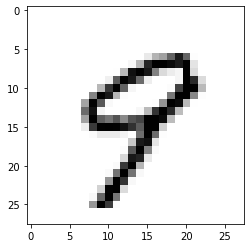

In [13]:
# Rerun the model Segment before running the below uncommented code line. Otherwise the code 
# model.load_weights('/content/drive/My Drive/Projects/MNIST/model.h5')

image_index = 6656
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())



## **Test Set Evaluation**

Once the model is trained, we check the  test loss and test accuracy with the test dataset that has been provided.

In [14]:
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

10000/10000 [==============================] - 4s 364us/step
test loss, test acc: [0.0345859735499449, 0.992]
